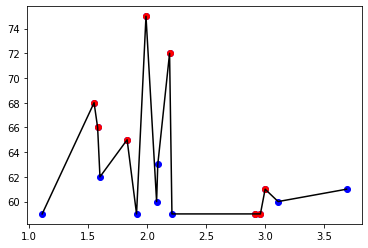

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from pprint import pprint

# Read data from csv file
data = []
with open('UsaFuelPassenger.csv') as f:
    data = [list(map(float, i)) for i in csv.reader(f)]
    # random.shuffle(data)
    
# Make train sets
x_train = np.array(list(map(lambda x: x[0], data[:])), dtype='float')
y_train = np.array(list(map(lambda y: y[1], data[:])), dtype='float')

# Make validation sets
x_val = np.array(list(map(lambda x: x[0], data[8:])), dtype='float')
y_val = np.array(list(map(lambda y: y[1], data[8:])), dtype='float')

plt.scatter(x_train, y_train, c='blue')
plt.scatter(x_val, y_val, c='red')
data.sort() # uncommend it , to see graph with connected points.
plt.plot(list(map(lambda x: x[0], data)), list(map(lambda x: x[1], data)), c='black') 
plt.show()

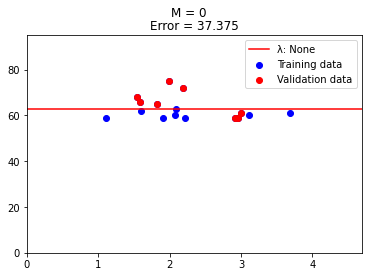

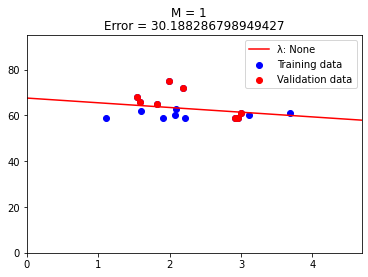

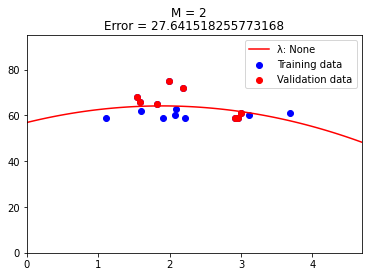

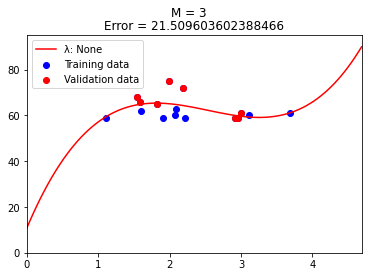

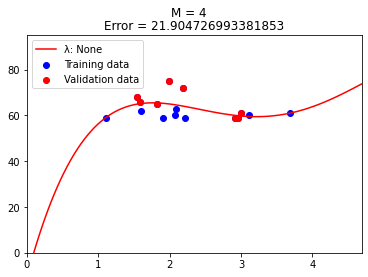

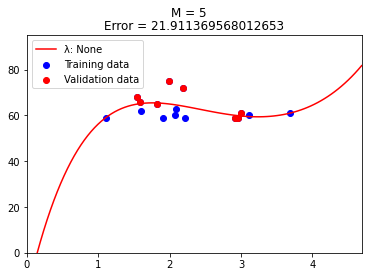

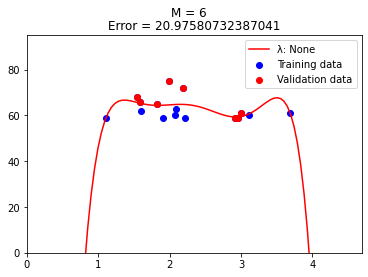

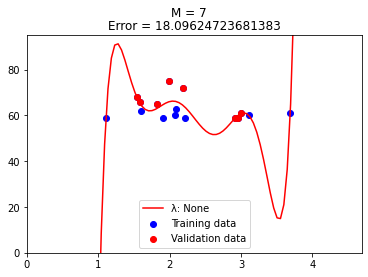

Best fitted model to training data:
Best model:
[[17.51018662]
 [16.39311938]
 [12.85794148]
 [ 6.28449585]
 [-2.06185565]
 [-6.2589346 ]
 [ 3.07772228]
 [-0.38788029]]


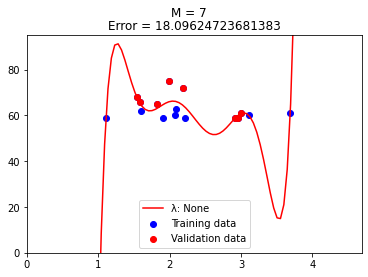

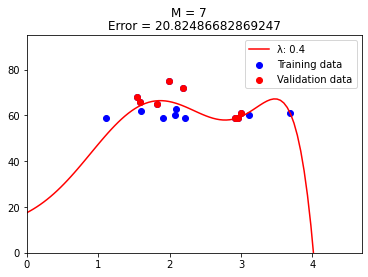

In [4]:
# Actual polynomial output value
def polynomial_output(x, a): 
    return np.sum([param[0] * x ** i for i, param in enumerate(a)], axis=0)


# Design matrix
def dm(x_train, M): 
    return np.array([[x ** j for j in range(M + 1)] for x in x_train], dtype='float')


# Mean squared error
def MSE(x, y, a):
    return np.mean(np.square(y - polynomial_output(x, a)))


# Draw model
def plot_model(a, x_train, y_train, x_val, y_val, M=None, error=None, lambda_=None):
    x = np.linspace(0, max(x_train) + 1, 100)
    y = polynomial_output(x, a)
    
    plt.scatter(x_train, y_train, c='blue', label='Training data')
    plt.scatter(x_val, y_val, c='red', label='Validation data')
    plt.plot(x, y, c='red', label=f'λ: {lambda_}')

    plt.xlim(right=max(x_train) + 1, left=0)
    plt.ylim(top=max(y_train) + 20, bottom=0)
    
    if error:
        plt.title(f'Error = {error}')
    plt.suptitle(f'M = {M}')
    plt.legend()
    plt.show()


# Model selection
M_range = range(8)
lambdas = [0.005, 0.03 ,0.4]

# First we need to find the power of polynomial 
# by choosing the best model with the least training error.
y = y_train[:, None]
models = []

for M in M_range:
    X = dm(x_train, M)
    f = X.transpose() @ X
    s = np.linalg.inv(f)
    th = s @ X.transpose()
    a = th @ y  # https://en.wikipedia.org/wiki/Polynomial_regression#Matrix_form_and_calculation_of_estimates 
    #a = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y  # https://en.wikipedia.org/wiki/Polynomial_regression#Matrix_form_and_calculation_of_estimates 
    val_error = MSE(x_val, y_val, a)
    models.append([a, val_error, M])
    plot_model(a, x_train, y_train, x_val, y_val, M=M, error=val_error)
    
model = min(models, key=lambda x: x[1])

print('Best fitted model to training data:')
plot_model(model[0], x_train, y_train, x_val, y_val, M=model[2], error=model[1])

# Then we can avoid overfitting with regularization. 
regs = []
for regularization_lambda in lambdas:
    X = dm(x_train, model[2])
    eps = regularization_lambda * np.eye(model[2] + 1)
    a = np.linalg.inv(X.transpose() @ X + eps) @ X.transpose() @ y
    regs.append([a, MSE(x_train, y_train, a), MSE(x_val, y_val, a), regularization_lambda, model[2]])
    plt.show()
    
# Plot best model
lambda_ = min(regs, key=lambda x: x[2])
print('Best model:')
print(lambda_[0])

plot_model(lambda_[0], x_train, y_train, x_val, y_val, M=lambda_[4], error=lambda_[2], lambda_=lambda_[3])

In [5]:
def get_prediction(x, a):
    y = polynomial_output(x, a)
    if y < 0:
        y = 0
    return y

x = 2
print(get_prediction(x, lambda_[0]))

66.05410997195972


In [6]:
# y = 65 + x*-3 + -9*x^2